<a href="https://colab.research.google.com/github/Sathya1926/gingivitis_detection/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ File loaded successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plaque_score         1000 non-null   float64
 1   bleeding_on_probing  1000 non-null   float64
 2   gum_color_1          1000 non-null   float64
 3   gum_color_2          1000 non-null   float64
 4   gum_color_3          1000 non-null   float64
 5   gingivitis_severity  1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB
None

🔍 First 5 rows of the dataset:
   plaque_score  bleeding_on_probing  gum_color_1  gum_color_2  gum_color_3  \
0     -3.430056             0.217687    -1.667156    -2.605821    -0.111399   
1      0.311417             0.790131     0.752325    -1.536275    -0.630619   
2      1.852117             1.846074    -1.064756    -0.045553    -0.090098   
3      1.377634             0.721065    -0.002402     0.763535

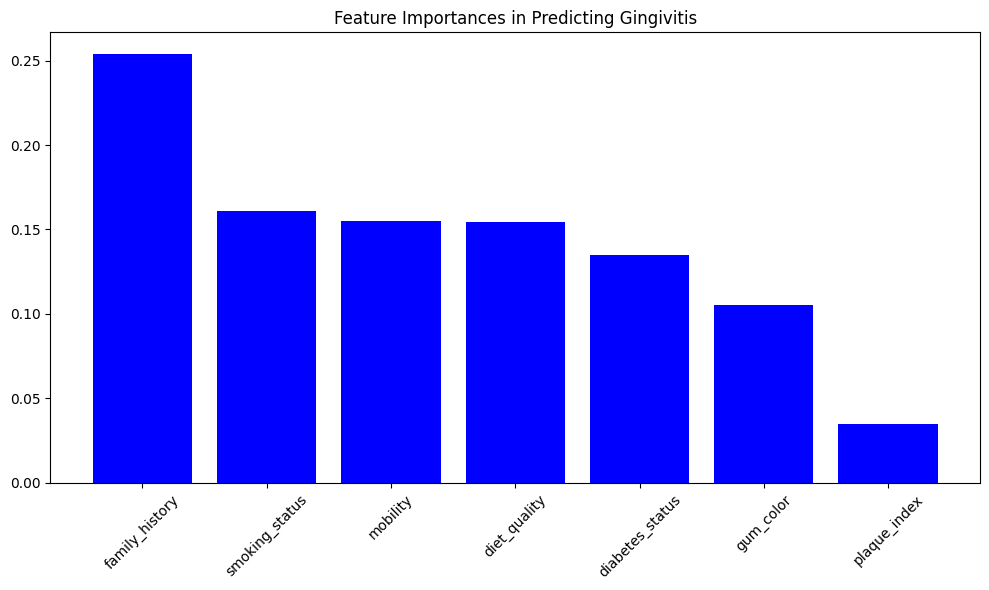

<Figure size 800x600 with 0 Axes>

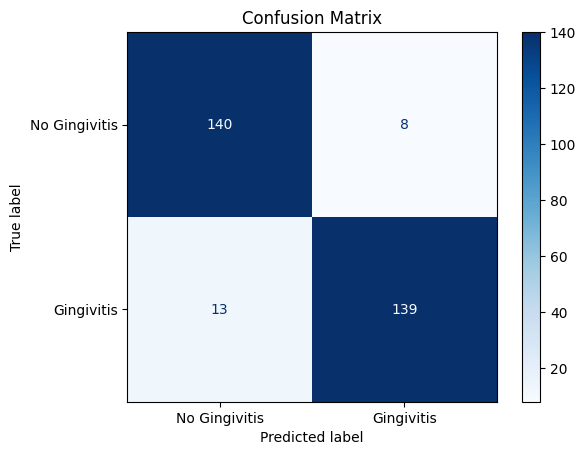

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
from google.colab import files
import pandas as pd


# Replace this with the exact filename you see in the Colab file sidebar
file_path = '/content/synthetic_gingivitis_detection (1).csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Show basic info and first few rows
print("✅ File loaded successfully!\n")
print(df.info())
print("\n🔍 First 5 rows of the dataset:")
print(df.head())


n_samples = 1000
n_features = 7  # 7 features to mimic the gingivitis-related factors
X, y = make_classification(n_samples=n_samples, n_features=n_features,
                           n_informative=5, n_redundant=1, n_classes=2,
                           random_state=42)

# Convert to a DataFrame for easier handling and feature naming
df = pd.DataFrame(X, columns=['smoking_status', 'plaque_index', 'gum_color',
                              'mobility', 'diabetes_status', 'family_history', 'diet_quality'])
df['gingivitis_severity'] = y

print(df.head())  # Check the first few rows of the dataset

# Step 2: Split the dataset into features (X) and target variable (y)
X = df.drop('gingivitis_severity', axis=1)
y = df['gingivitis_severity']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 7: Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix to calculate Sensitivity and Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)
# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

# Step 9: Feature Importance Visualization
feature_importances = clf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Predicting Gingivitis")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Gingivitis', 'Gingivitis']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()